### Análise imobiliária
https://www.statsmodels.org/0.6.1/examples/notebooks/generated/ols.html

In [57]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [58]:
data = pd.read_csv("C:/Users/gabri/OneDrive/Área de Trabalho/Python/Machine learning 101/S3-L25/real_estate_price_size_year.csv")
data.head()

,price,size,year
0,234314.144,643.09,2015
1,228581.528,656.22,2009
2,281626.336,487.29,2018
3,401255.608,1504.75,2015
4,458674.256,1275.46,2009


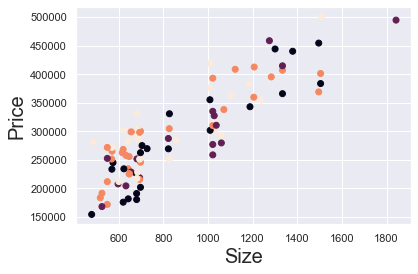

In [59]:
plt.scatter(data['size'],data['price'],c=data['year'])
plt.xlabel('Size', fontsize=20)
plt.ylabel("Price", fontsize=20)
plt.show()

### Price and size are positive correlatated. The year are not.

In [60]:
X = data[['size','year']]
y = data['price']

In [61]:
X = sm.add_constant(X)
X.head()

,const,size,year
0,1.0,643.09,2015
1,1.0,656.22,2009
2,1.0,487.29,2018
3,1.0,1504.75,2015
4,1.0,1275.46,2009


In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   100 non-null    float64
 1   size    100 non-null    float64
 2   year    100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


### Fazer o fit por least squares

In [63]:
results = sm.OLS(y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                     168.5
Date:                Sat, 26 Jun 2021   Prob (F-statistic):           2.77e-32
Time:                        23:05:28   Log-Likelihood:                -1191.7
No. Observations:                 100   AIC:                             2389.
Df Residuals:                      97   BIC:                             2397.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -5.772e+06   1.58e+06     -3.647      0.000   -8.91e+06   -2.63e+06
size         227.7009     12.474     18.254      0.000     202.943     252.458
year        2916.7853    785.896      3.711      0.000    1357.000    4476.571
==============================================================================
Omnibus:                       10.083   Durbin-Watson:                   2.250
Prob(Omnibus):                  0.006   Jarque-Bera (JB):                3.678
Skew:                           0.095   Prob(JB):                        0.159
Kurtosis:                       2.080   Cond. No.                     9.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# vem num array e fazendo um produto escalar tem a equação
results.params

### Criar novos dados para verificar o preço

In [64]:
new_data = pd.DataFrame({'const':1, "size":[800,1000],"year":[2019,2017]})
new_data

,const,size,year
0,1,800,2019
1,1,1000,2017


In [66]:
prediction = results.predict(new_data)
prediction = pd.DataFrame({'Price':prediction})
prediction

,Price
0,298883.240629
1,338589.840777


In [67]:
new_data = new_data.join(prediction)
new_data

,const,size,year,Price
0,1,800,2019,298883.240629
1,1,1000,2017,338589.840777
